In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
election_data= pd.read_csv("Datasets\General Election Data.csv")
election_data=election_data[election_data.Year.isin([ 1962, 1967,1971, 1977, 1980, 1984,1989,1991, 1996, 1998, 1999, 2004, 2009, 2014, 2019])]

india_map= gpd.read_file("India Map\India Map 1977\india_map_1977.shp")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Text(0.5, 1.0, 'Unity of Opposition Parties against Ruling Party')

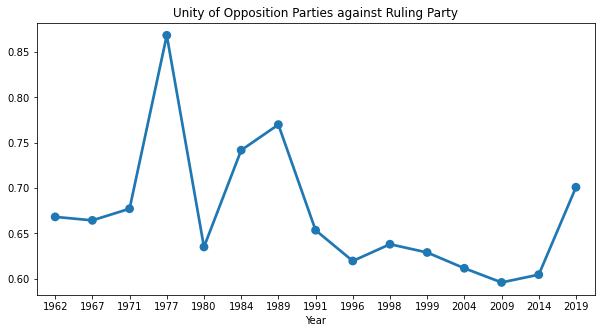

In [3]:
oppo_parties = election_data
oppo_parties=oppo_parties[ (oppo_parties["Party"] != "INC") & (oppo_parties["Year"].isin([1962, 1967, 1971, 1977, 1984, 1989, 1991, 1996, 1998, 2009, 2014]))]


oppo_parties=pd.concat([oppo_parties, election_data[(election_data["Party"] != "BJP") & (election_data["Year"].isin([1999, 2004, 2019]))] ])

oppo_parties=pd.concat([oppo_parties, election_data[(election_data["Party"] != "JNP") & (election_data["Year"].isin([1980]))] ])


oppo_parties= oppo_parties.groupby(by=["Year", "State_Name","Constituency_Name"])

oppo_unity=(oppo_parties["Votes"].agg(np.max)/oppo_parties["Votes"].agg(np.sum)).groupby(by="Year").agg(np.mean)

fig= plt.figure(figsize=(10,5))
sns.pointplot(y=oppo_unity.values, x=oppo_unity.index)

plt.title("Unity of Opposition Parties against Ruling Party")

In [27]:
election_1977= election_data[(election_data["Year"]==1977) & (election_data["Party"] !="INC")]

constituencies = election_1977.groupby(by="Constituency_Name")

oppo_unity= constituencies["Votes"].agg()

Index(['Unnamed: 0', 'Election_Type', 'State_Name', 'Assembly_No',
       'Constituency_No', 'Year', 'month', 'Poll_No', 'DelimID', 'Position',
       'Candidate', 'Sex', 'Party', 'Votes', 'Candidate_Type', 'Valid_Votes',
       'Electors', 'Constituency_Name', 'Constituency_Type', 'Sub_Region',
       'N_Cand', 'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost',
       'Margin', 'Margin_Percentage', 'ENOP', 'pid', 'Party_Type_TCPD',
       'Party_ID', 'last_poll', 'Contested', 'Last_Party', 'Last_Party_ID',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'Age', 'District_Name', 'won'],
      dtype='object')

In [87]:
election_1977= election_data[(election_data["Year"]==1977)]

constituencies = election_1977.groupby(by="Constituency_Name")

constituencies= constituencies.filter(lambda x: "INC" in x.Party.values)

constituencies= constituencies[constituencies["Party"] != "INC"]

constituencies= constituencies.groupby(by="Constituency_Name")

inc_candidates= election_1977[election_1977["Party"]=="INC"]

inc_candidates = inc_candidates.merge(constituencies["Votes"].agg(np.max)/constituencies["Votes"].agg(np.sum), on="Constituency_Name")

inc_candidates.rename(columns={"Votes_x":"Votes","Votes_y":"Opposition_Unity"}, inplace=True)

inc_candidates["Won"] =inc_candidates["Position"]==1


In [88]:
#Calculating state-wise average vote share of Congress candidates in 1971 election
inc_1971=election_data[(election_data['Year']==1971) & (election_data["Party"]=="INC")]         
inc_1971=inc_1971.groupby("Constituency_Name")

inc_1971= inc_1971.Vote_Share_Percentage.agg(np.mean)


#Calculating state-wise average vote share of Congress candidates in 1977 election
inc_1977=election_data[(election_data['Year']==1977) & (election_data["Party"]=="INC")]         
inc_1977=inc_1977.groupby("Constituency_Name")

inc_1977= inc_1977.Vote_Share_Percentage.agg(np.mean)


#Calculating diffrence in state-wise average vote share among the 1971 and 1977 election
vote_diff= inc_1977 - inc_1971

inc_candidates= inc_candidates.merge(vote_diff, on="Constituency_Name")
inc_candidates.rename(columns={"Vote_Share_Percentage_x":"Vote_Share_Percentage","Vote_Share_Percentage_y": "Vote_Diff"}, inplace=True)

<AxesSubplot:xlabel='Opposition_Unity', ylabel='Vote_Diff'>

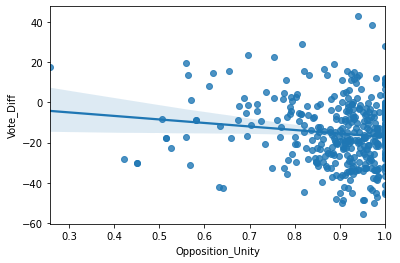

In [109]:
sns.regplot(data=inc_candidates, y="Vote_Diff", x="Opposition_Unity", robust=True)

<AxesSubplot:ylabel='Opposition_Unity'>

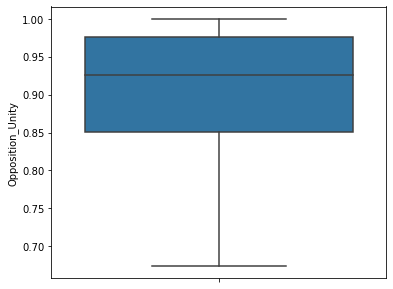

In [113]:
plt.figure(figsize=(6,5))
sns.boxplot(data=inc_candidates, y="Opposition_Unity",showfliers=False)

In [110]:
inc_candidates.columns

Index(['Election_Type', 'State_Name', 'Assembly_No', 'Constituency_No', 'Year',
       'month', 'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party',
       'Votes', 'Candidate_Type', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'N_Cand',
       'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin',
       'Margin_Percentage', 'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID',
       'last_poll', 'Contested', 'Last_Party', 'Last_Party_ID',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'Age', 'District_Name',
       'Opposition_Unity', 'Won', 'Vote_Diff'],
      dtype='object')

In [108]:
inc_candidates[["Vote_Diff", "Opposition_Unity"]].corr()

,Vote_Diff,Opposition_Unity
Vote_Diff,1.000000,-0.126312
Opposition_Unity,-0.126312,1.000000
